# APPLICATION OF ADMM FOR QUADRATIC PROGRAMMING

In [1]:
# Importing the necessary packages
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(70) # For reproducibility

### Initializations for QP - ADMM

Original Problem: 

$min_{u} \;\frac{1}{2}u^TQu+q^Tu \;$ s.t. $Au\leq b$

In [2]:
Nu = 500
Nb = 250
tau = 1
A = np.random.normal(0, 1, (Nb, Nu))

In [3]:
Q_temp = np.random.normal(0, 1, (Nu, Nu))
Q = np.dot(Q_temp.T, Q_temp) # Q is psd

In [4]:
q = np.random.normal(0, 1, Nu)
b = np.random.normal(0, 1, Nb)

v_init = np.random.normal(0, 1, Nb)
lambd_init = np.random.rand(Nb)

### Standard ADMM

In [5]:
v = v_init
lambd = lambd_init
primal_res = []
dual_res = []
iters = np.arange(0, 500)

cached_inv = np.linalg.inv((Q + tau*np.matmul(A.T, A)))

for k in iters:
    u = np.matmul(cached_inv, np.dot(A.T, lambd+tau*v) - q) # u-update
    v_prev = v
    v = np.minimum(np.dot(A, u) - (lambd/tau), b) # v-update
    lambd = lambd + tau*(v - np.dot(A, u)) # lambda-update

    primal_res.append(np.linalg.norm(v - np.dot(A, u), 2))
    dual_res.append(np.linalg.norm(-tau*np.matmul(A.T, v - v_prev), 2))

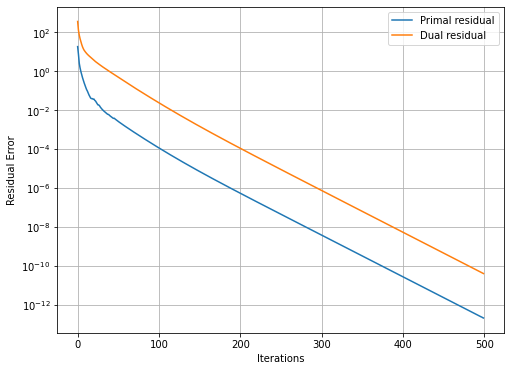

In [6]:
plt.figure(figsize=(8,6))
plt.plot(primal_res, label="Primal residual")
plt.plot(dual_res, label="Dual residual")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual Error")
plt.legend()
plt.grid()

### FISTA-Accelerated ADMM for Strongly Convex H and G

Note that here $G(v) = I_{v\leq b}$ is NOT strongly convex (proved in the term paper), so this algorithm should not converge as per the theory. We still implemented it, and that is what we observed below:

In [7]:
v = v_init
v_hat = v_init
lambd = lambd_init
lambd_hat = lambd_init
alpha = 1

primal_res_acc = []
dual_res_acc = []
iters = np.arange(0, 500)

cached_inv = np.linalg.inv((Q + tau*np.matmul(A.T, A)))

for k in iters:
    u = np.matmul(cached_inv, np.dot(A.T, lambd_hat+tau*v_hat) - q)

    v_prev = v
    v = np.minimum(np.dot(A, u) - (lambd_hat/tau), b)

    lambd_prev = lambd
    lambd = lambd_hat + tau*(v - np.dot(A, u))

    alpha_prev = alpha
    alpha = (1+np.sqrt(1+4*(alpha**2)))/2

    v_hat = v + (alpha_prev-1)*(v - v_prev)/alpha
    lambd_hat = lambd + (alpha_prev-1)*(lambd-lambd_prev)/alpha

    primal_res_acc.append(np.linalg.norm(v - np.dot(A, u), 2))
    dual_res_acc.append(np.linalg.norm(-tau*np.matmul(A.T, v - v_prev), 2))

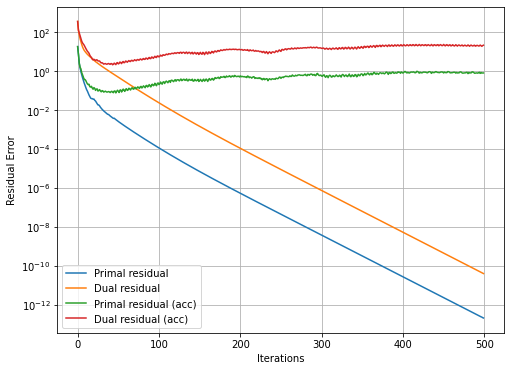

In [8]:
# Primal and dual residual plots
plt.figure(figsize=(8,6))
plt.plot(iters, primal_res, label="Primal residual")
plt.plot(iters, dual_res, label="Dual residual")
plt.plot(iters, primal_res_acc, label="Primal residual (acc)")
plt.plot(iters, dual_res_acc, label="Dual residual (acc)")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual Error")
plt.legend()
plt.grid()